In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

# installing and import dependencies

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Zummit/Zummit

/content/drive/MyDrive/Zummit/Zummit


In [4]:
pwd

'/content/drive/MyDrive/Zummit/Zummit'

# Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-2 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 32 --epochs 10 --data carScr_up.yaml --weights yolov5s.pt --cache --evolve

Streaming output truncated to the last 5000 lines.
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  models.common.C3                        [512, 512, 1]    

In [5]:
!cd yolov5 && python train.py --img 320 --batch 32 --epochs 50 --data carScr_up.yaml --weights yolov5s.pt --hyp '/content/drive/MyDrive/Zummit/Zummit/yolov5/runs/evolve/exp7/hyp_evolve.yaml'

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.2 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5s.pt, cfg=, data=carScr_up.yaml, hyp=/content/drive/MyDrive/Zummit/Zummit/yolov5/runs/evolve/exp7/hyp_evolve.yaml, epochs=50, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_per

In [26]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp27/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-5 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [27]:
#model

In [28]:
img = 'https://t3.ftcdn.net/jpg/02/45/94/96/360_F_245949687_WRQXIFri8xtX3m4oaGgV9Ejun7oIRr1o.jpg'
img1 = '/content/drive/MyDrive/Zummit/Zummit/yolov5/data/images/test1.jpg'
img2 = '/content/drive/MyDrive/Zummit/Zummit/yolov5/data/images/test2.jpg'

In [35]:
result = model(img)

In [36]:
print(result)

image 1/1: 360x540 2 scratchs
Speed: 69.1ms pre-process, 10.5ms inference, 1.3ms NMS per image at shape (1, 3, 448, 640)


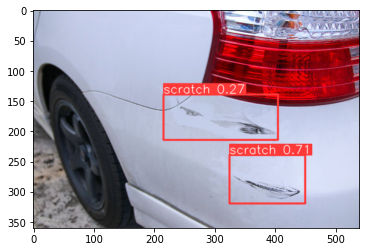

In [37]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()